# **Beyond Accuracy**

## Accuracy

**Accuracy**: The share of all total predictions that were correct.

### Data

Let's say our model is trying to predict Fraudlent among the transactions.

In our dataset, there are only 5% of fradulent data.

In [1]:
from sklearn.datasets import make_classification

In [3]:
# dummay data for transactions
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                          n_redundant=0, n_repeated=0, n_classes=2,
                          n_clusters_per_class=1,
                          weights=[0.95, 0.005],
                          class_sep=0.8, random_state=0)

In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['target'] = y

In [8]:
df.head()

,feature_1,feature_2,target
0,-0.200228,-1.126880,0
1,-0.873630,0.999259,0
2,-0.722953,0.106167,0
3,-0.548422,1.903053,0
4,-1.254758,2.445131,0


In [9]:
df['target'].value_counts()

0    967
1     33
Name: target, dtype: int64

Let's say if we make our contstant predictions as 0, we will be right 95% of the time. Because 95% of data is No Fradulent (0). Our data is very imbalanced.

In [20]:
# demo purpose, make all predictions as 0
df['predictions'] = 0

df.head()

,feature_1,feature_2,target,predictions
0,-0.200228,-1.126880,0,0
1,-0.873630,0.999259,0,0
2,-0.722953,0.106167,0,0
3,-0.548422,1.903053,0,0
4,-1.254758,2.445131,0,0


### Evaluate our models

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(df['target'], df['predictions'])

0.967

So if we look accuracy alone, our model is very good. But, is it really good????

--------

## **True Positive Rate aka Sensitivity**

In [23]:
positive_df = df[df['target']==1]

In [24]:
accuracy_score(positive_df['target'], positive_df['predictions'])

0.0

We can see that our Sensitivity is 0 which is really worst.

-------

## **True Negative Rate aka Specificity**

In [25]:
negative_df = df[df['target'] == 0]

In [26]:
accuracy_score(negative_df['target'], negative_df['predictions'])

1.0

Of course we will get 1.0 because we put all transactions as non-fradulent and hard coded 0 as predictions.

Because 95% of our data is non-fradulent data.

-------

### Prep data as randomly predicted value

Now we know our predictions is bad, we want to stimulate the predictions. So we will randomly put 0 and 1 as predictions.

In [27]:
df['predictions'] = np.random.randint(0, 2, df.shape[0])

In [28]:
df.head()

,feature_1,feature_2,target,predictions
0,-0.200228,-1.126880,0,1
1,-0.873630,0.999259,0,1
2,-0.722953,0.106167,0,1
3,-0.548422,1.903053,0,0
4,-1.254758,2.445131,0,1


------

## Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
confusion = confusion_matrix(df['target'], df['predictions'])

In [33]:
# plot the confusion matrix
import seaborn as sns

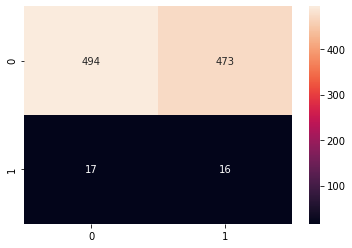

In [37]:
sns.heatmap(confusion, annot=True, fmt='g');

# X-axis : Predictions
# Y-axis : True values

-------

## Recall
**Recall** is the ability of the classifier to find all the positive samples

In [38]:
from sklearn.metrics import recall_score

In [39]:
recall_score(df['target'], df['predictions'])

0.48484848484848486

----

## Precision
**Precision** tells us how relevant our result is

In [40]:
from sklearn.metrics import precision_score

In [41]:
precision_score(df['target'], df['predictions'])

0.032719836400818

-------

## F1 Score
**F1 Score:** the weighted average of precision and recall

In [42]:
from sklearn.metrics import f1_score

In [43]:
f1_score(df['target'], df['predictions'])

0.061302681992337175

----

## Classification Report

In [30]:
print(classification_report(df['target'], df['predictions']))

              precision    recall  f1-score   support

           0       0.97      0.51      0.67       967
           1       0.03      0.48      0.06        33

    accuracy                           0.51      1000
   macro avg       0.50      0.50      0.36      1000
weighted avg       0.94      0.51      0.65      1000



------

## ROC Curve and AUC

+ A ROC curve is the most commonly used way to visualize the performance of a binary classifier
+ AUC is the best way to summarise its performance in a single number.

https://medium.com/analytics-vidhya/what-is-the-roc-auc-curve-and-how-to-use-it-14e16b630852

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [52]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [67]:
# Generate Model
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)

model = RandomForestClassifier()
model.fit(trainX, trainy)

probs = model.predict_proba(testX)

probs[:5]

array([[0.95, 0.05],
       [0.06, 0.94],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.04, 0.96]])

AUC: 0.96


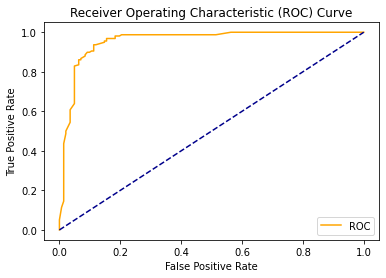

In [65]:
# Plot ROC Curve
probs = probs[:, 1]

auc = roc_auc_score(testy, probs)

print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(testy, probs)

plot_roc_curve(fpr, tpr)